In [5]:
# Importing the needed libraries.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import math
from keras.utils.vis_utils import plot_model

# Printing only if we can use the cores from colab.
if (tf.config.list_physical_devices('GPU')):
  print("Cores are available!")


In [6]:
# Assigning the data that we are going to work with to a variable.
nba_data = pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")
# Prints out the first 5 elements so we can make sure the data is loaded correctly.
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [7]:
# Deleting all the fields that have N/A (Don't have assigned value).
nba_data.isna().sum()
nba_data = nba_data.dropna()

In [9]:
# Copying the data from nba_data and deleting the rows that have string values.
nba_data_numeric = nba_data.copy()
del nba_data_numeric["first_name"]
del nba_data_numeric["last_name"]
del nba_data_numeric["team"]
del nba_data_numeric["pos"]
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [10]:
# Function that cleans up value from a certain row(removes $).
def clean_curr(x):
  if isinstance(x, str):
    return (x.replace('$', '').replace(',', ''))
  return (x)

In [11]:
# Cleaning the salary row, so that it only contains numbers. 
nba_data_numeric["salary"] = nba_data_numeric['salary'].apply(clean_curr).astype('float')
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [12]:
# Shaping and displaying vital information.
print(np.shape(nba_data_numeric))
print(nba_data_numeric.describe())

(289, 27)
             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.000000    0.23100

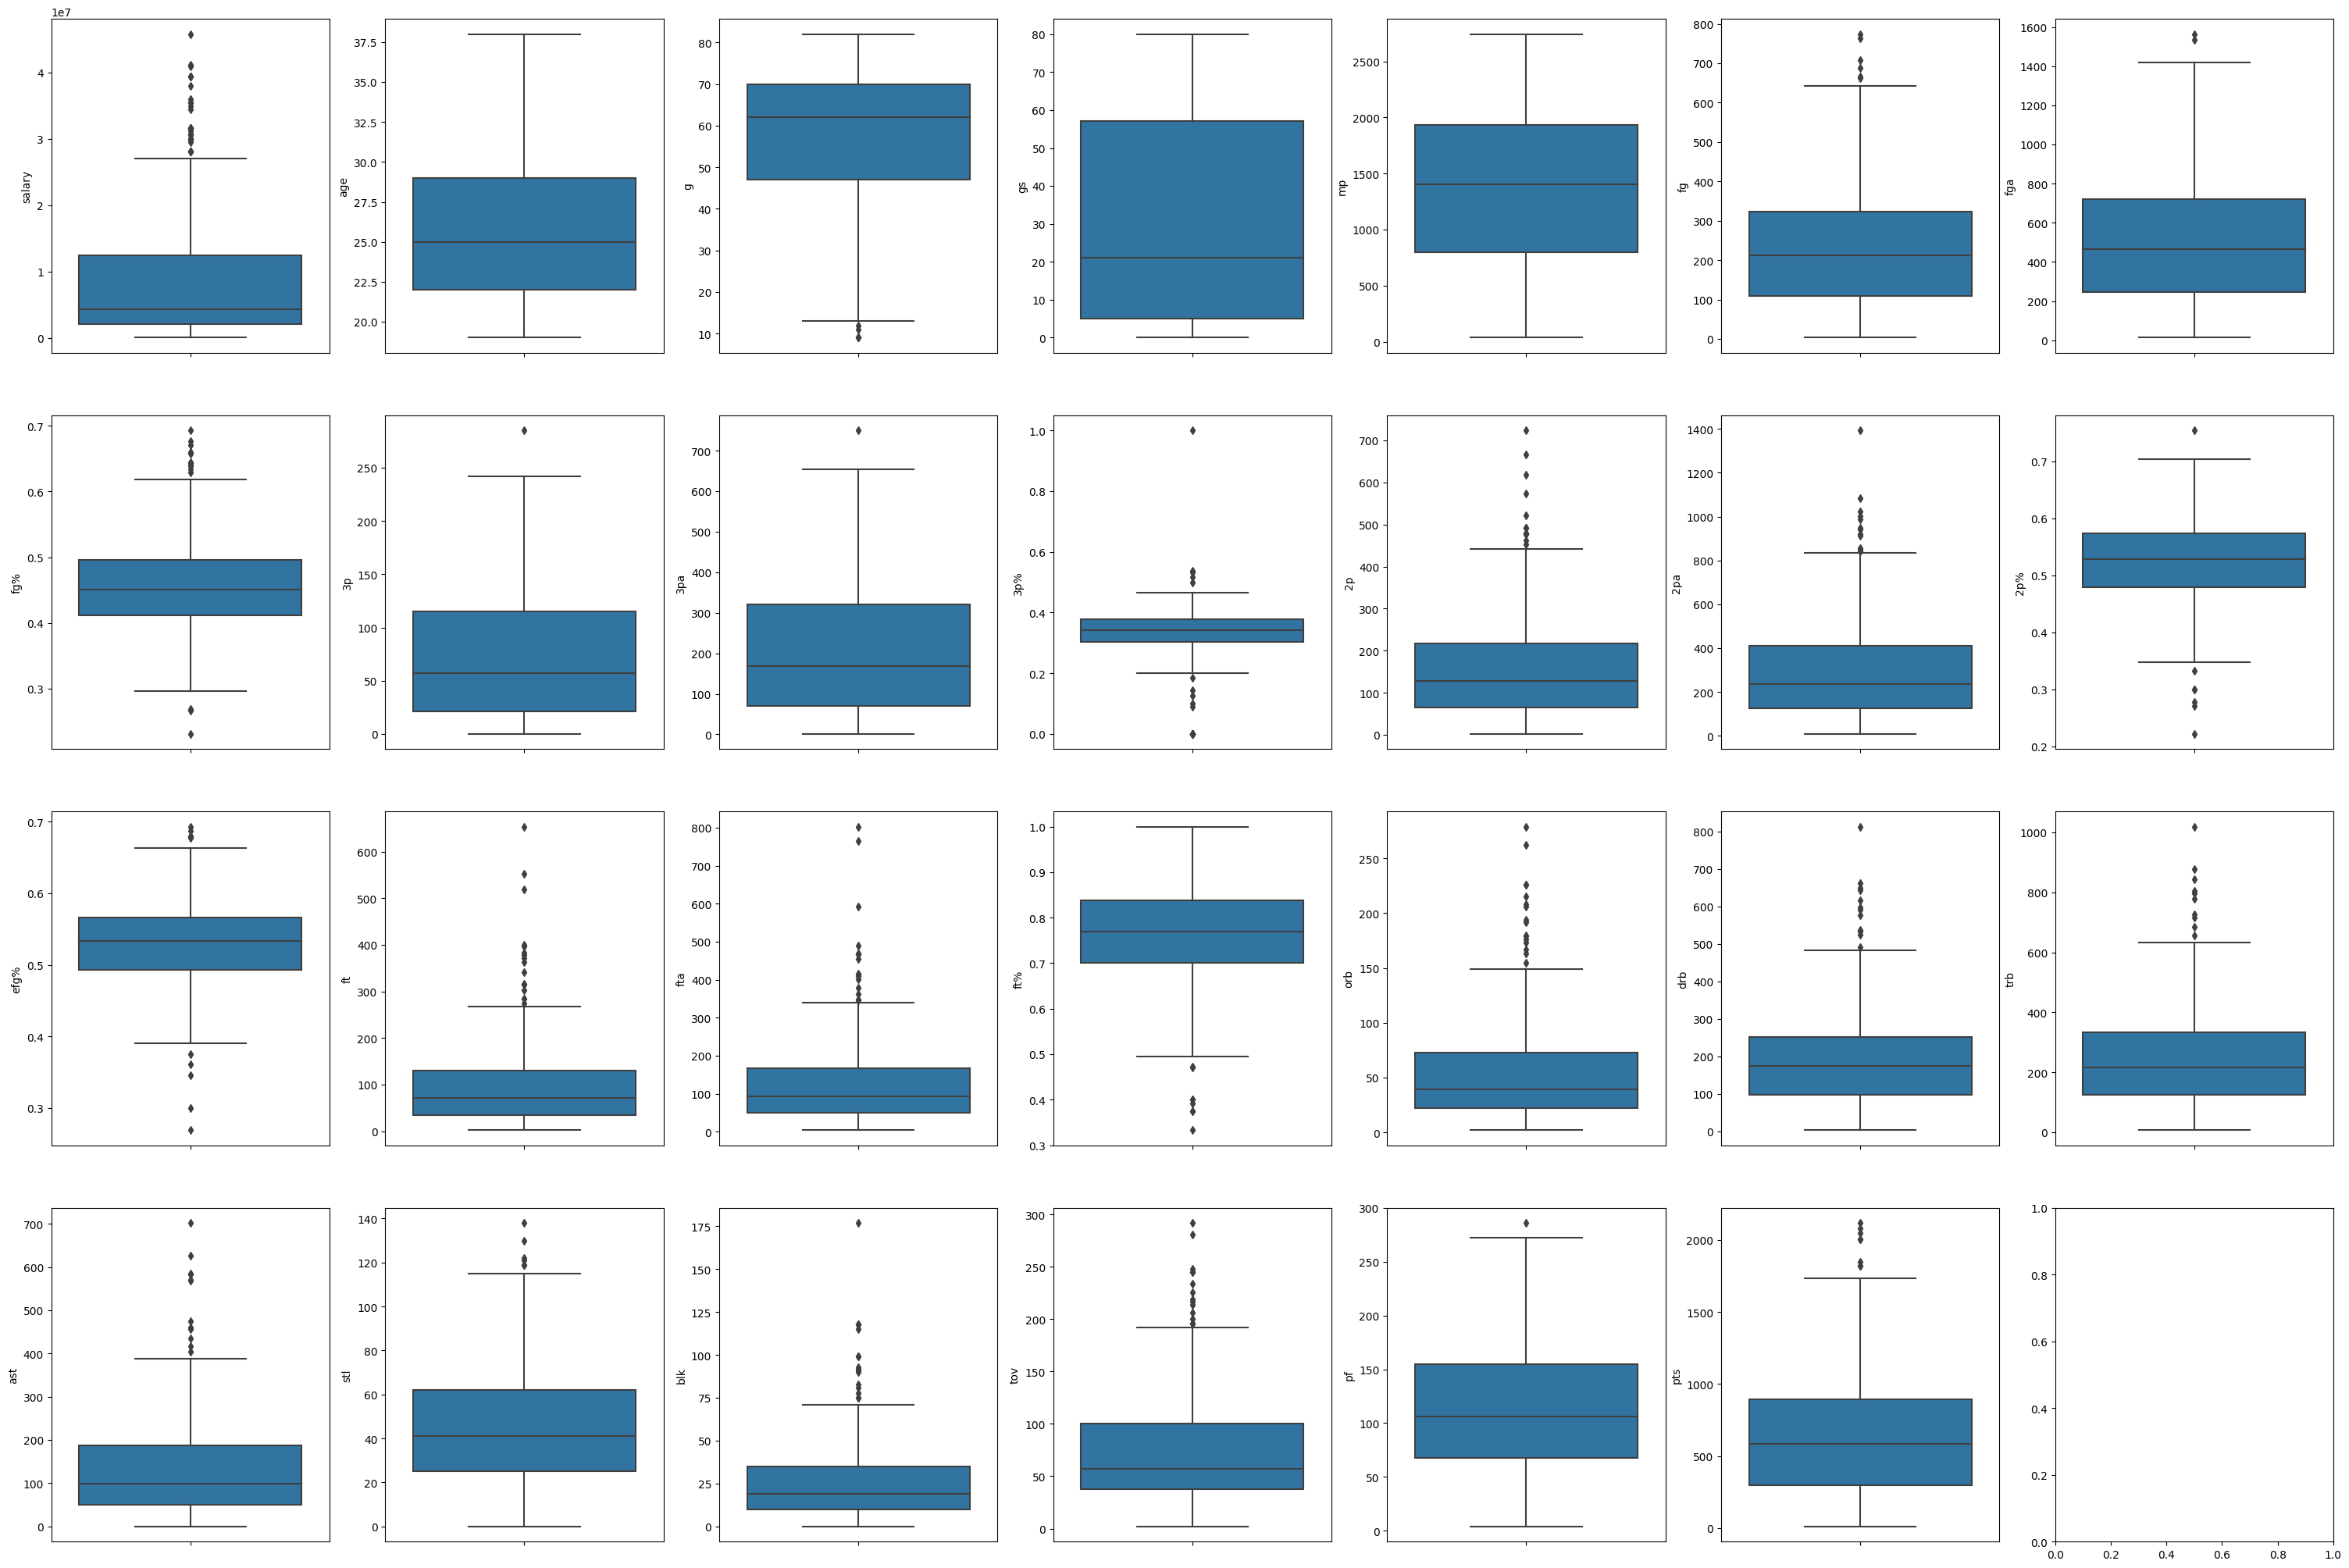

In [13]:
# Comparing variables with boxplot. The boxes show quartiles of the data.
# The middle is the median.
# The whiskers extend to all the other data aside from the points that are 
# considered to be outliers
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30,20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items():
  sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index])
  index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

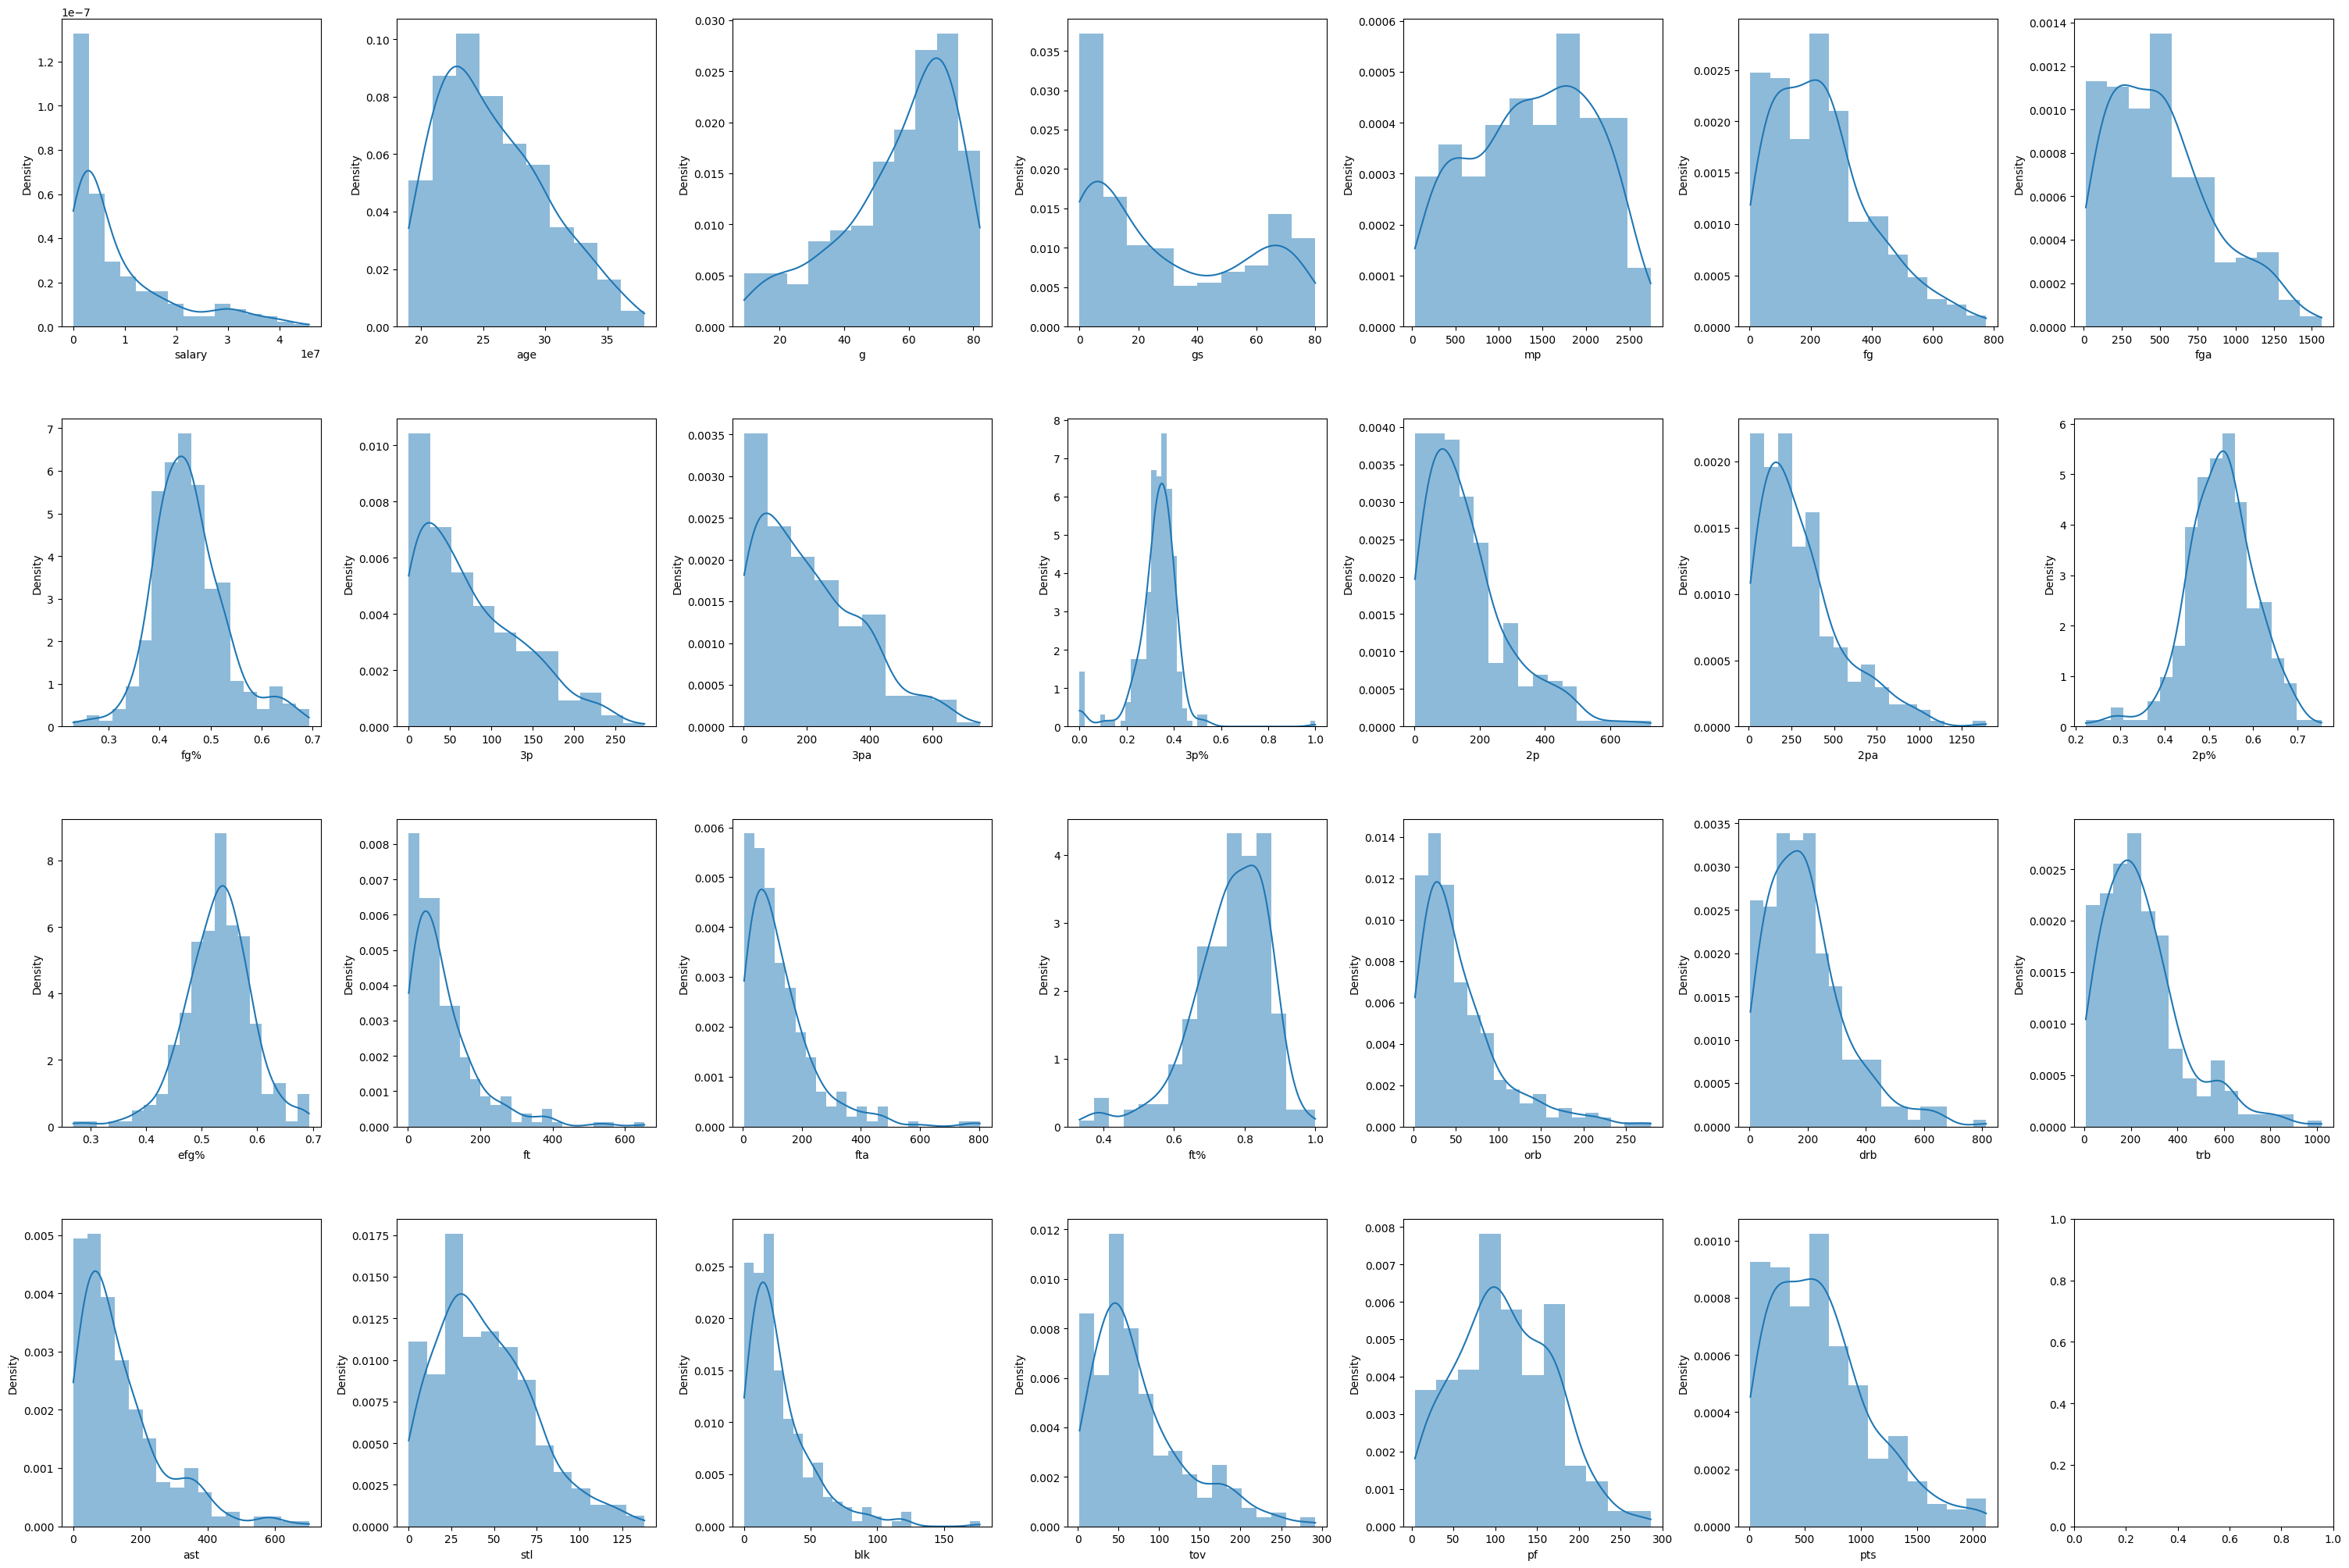

In [15]:
# We display histograms of the values so that we can analyze and choose the data
# with the similar histogram of salary.
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items():
  sns.histplot(v , ax=axs[index], kde=True, stat="density", linewidth=0)
  index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

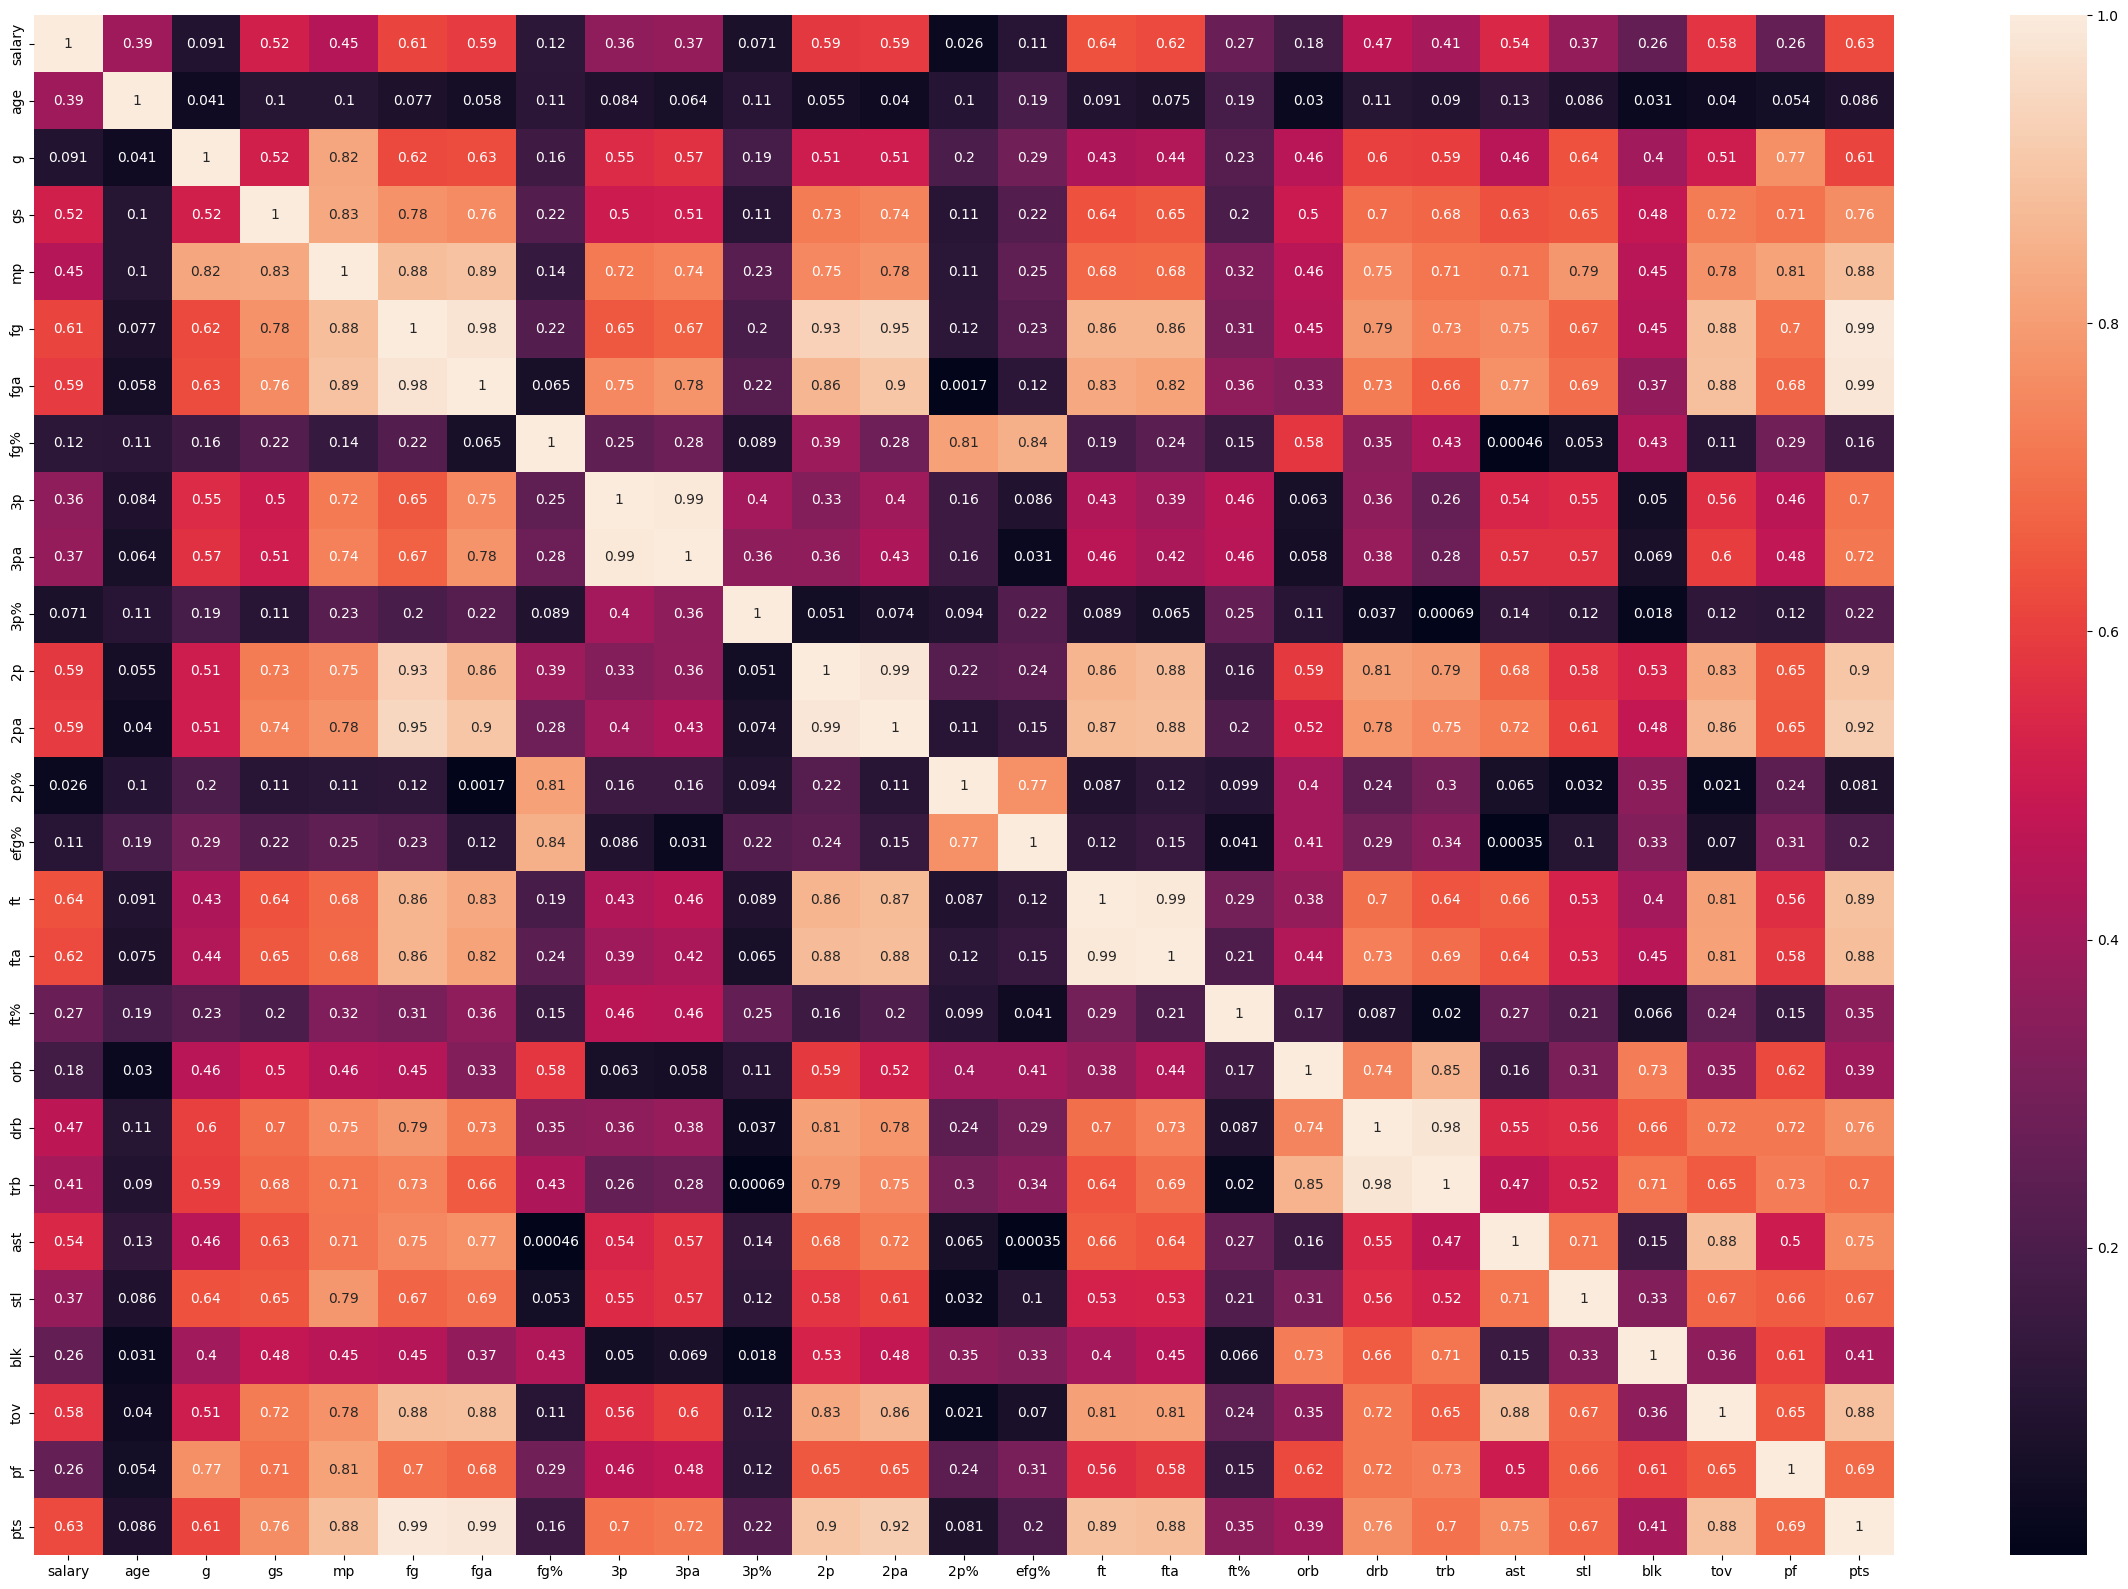

In [16]:
# We create a correlation map so that we can see which values is related.
# We are looking for data with high correlation compared to salary.
# In our case the values of fg, ft, fta, tov, pts.
plt.figure(figsize=(30, 20))
sns.heatmap(nba_data_numeric.corr().abs(), annot=True)

In [17]:
# Defining fences around the data which allows us to find the percentage of
# outliers in our data.
for k, v in nba_data_numeric.items():
  # Identifying the 1st quartile
  q1 = v.quantile(0.25)
  # Identifying the 3st quartile
  q3 = v.quantile(0.75)
  # Interquartile range
  iqr = q3 - q1
  # Lower fence is q1 - (1.5 * iqr)
  # Upper fence is q3 + (1.5 * iqr)
  # Storing outliers if they are above these fences.
  v_col = v[(v <= q1 - 1.5 *iqr) | (v >= q3+ 1.5 * iqr)]
  # Calculating the percentage of total outliers
  perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
  print("%s Outliers = %.2f%%" % (k, perc))

salary Outliers = 9.69%
age Outliers = 0.00%
g Outliers = 1.73%
gs Outliers = 0.00%
mp Outliers = 0.00%
fg Outliers = 2.08%
fga Outliers = 0.69%
fg% Outliers = 4.84%
3p Outliers = 0.35%
3pa Outliers = 0.35%
3p% Outliers = 6.57%
2p Outliers = 4.50%
2pa Outliers = 4.15%
2p% Outliers = 2.42%
efg% Outliers = 3.81%
ft Outliers = 5.54%
fta Outliers = 5.54%
ft% Outliers = 2.77%
orb Outliers = 5.54%
drb Outliers = 4.15%
trb Outliers = 3.46%
ast Outliers = 4.15%
stl Outliers = 2.08%
blk Outliers = 5.54%
tov Outliers = 4.84%
pf Outliers = 0.35%
pts Outliers = 2.77%


In [19]:
# We commonly initialize with random weights to begin an analysis.
# Seed is used so that we can get the same random later.
rand_tensor = tf.random.Generator.from_seed(66)
rand_tensor = rand_tensor.normal(shape=(3,2), mean=0.0, stddev=1.0)
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

In [20]:
# Creating a Numpy array 1-24
np_array = np.arange(1,25, dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [21]:
tensor2 = tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [23]:
# Changing the shape of tensor (6 * 2 * 2 = 24)
tensor3 = tf.constant(np_array, shape=(6,2,2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]], dtype=int32)>

In [25]:
# First index.
print("Index 0 :", tensor3[:1])
# Shape : number of values of each dimension.
print("Values in dimension :", tensor3.shape)
# Rank : number of tensor dimensions (Scalar = 0, Vector = 2, etc)
print("Dimension :", tensor3.ndim)
# Size : total values in tensor.
print("Total Value :", tf.size(tensor3).numpy())
# Getting the data type.
print("Data Type :", tensor3.dtype)

Index 0 : tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
Values in dimension : (6, 2, 2)
Dimension : 3
Total Value : 24
Data Type : <dtype: 'int32'>


In [26]:
# We need to take our columns and transform them before passing them into 
# our neural network.
# We will transform our provided features between 0 and 1.

# High correlation features fg, ft, fta, tov, pts
ct = make_column_transformer(
    # Normalize these columns
    (MinMaxScaler(), ["fg", "ft", "fta", "tov", "pts" 

]))
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['fg', 'ft', 'fta', 'tov', 'pts'])])

In [27]:
X = nba_data.drop("salary", axis=1) # Features (NBA Stats)
y = nba_data["salary"] # Label (Player Salary)


In [28]:
# Training 80%
# Testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=66)

In [29]:
# Transforming training data.
ct.fit(X_train)
# Transforming training and test data with normalization (MinMaxScalar) 
# and one hot encoding (OneHotEncoder).
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [30]:
# Features (0 - 1) without losing their value.
X_train_normal

array([[0.0843061 , 0.04141104, 0.04380476, 0.1       , 0.07787274],
       [0.66018158, 0.46165644, 0.49687109, 0.83793103, 0.68138651],
       [0.44747082, 0.25613497, 0.24906133, 0.45862069, 0.43494777],
       ...,
       [0.47600519, 0.1196319 , 0.20650814, 0.14482759, 0.38366572],
       [0.29442283, 0.16104294, 0.1514393 , 0.28965517, 0.32573599],
       [0.17250324, 0.06748466, 0.07133917, 0.14827586, 0.15337132]])

In [31]:
# Setting random seed so we can reproduce our results.
tf.random.set_seed(66)
# relu (Rectified Linear Unit) is a function that is computationally efficient.

# Creating a model and sequentially go through the data.
nba_model = tf.keras.Sequential([
     # 4 hidden layers with 3 having 100 neurons (Outputs)
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1, activation="relu")
 ])
# Compiling the model (Calc errors, optimize and evaluate).
nba_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), 
                  metrics=["mae"])
# Taking the data and trying to fit it with 200 tries creating a trained model.
# Fitting the model for 200 epochs.
# An epoch is a full iteration over the training data
fit_data= nba_model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 4526598.0000 - mae: 4526598.0000


<Axes: ylabel='Epochs'>

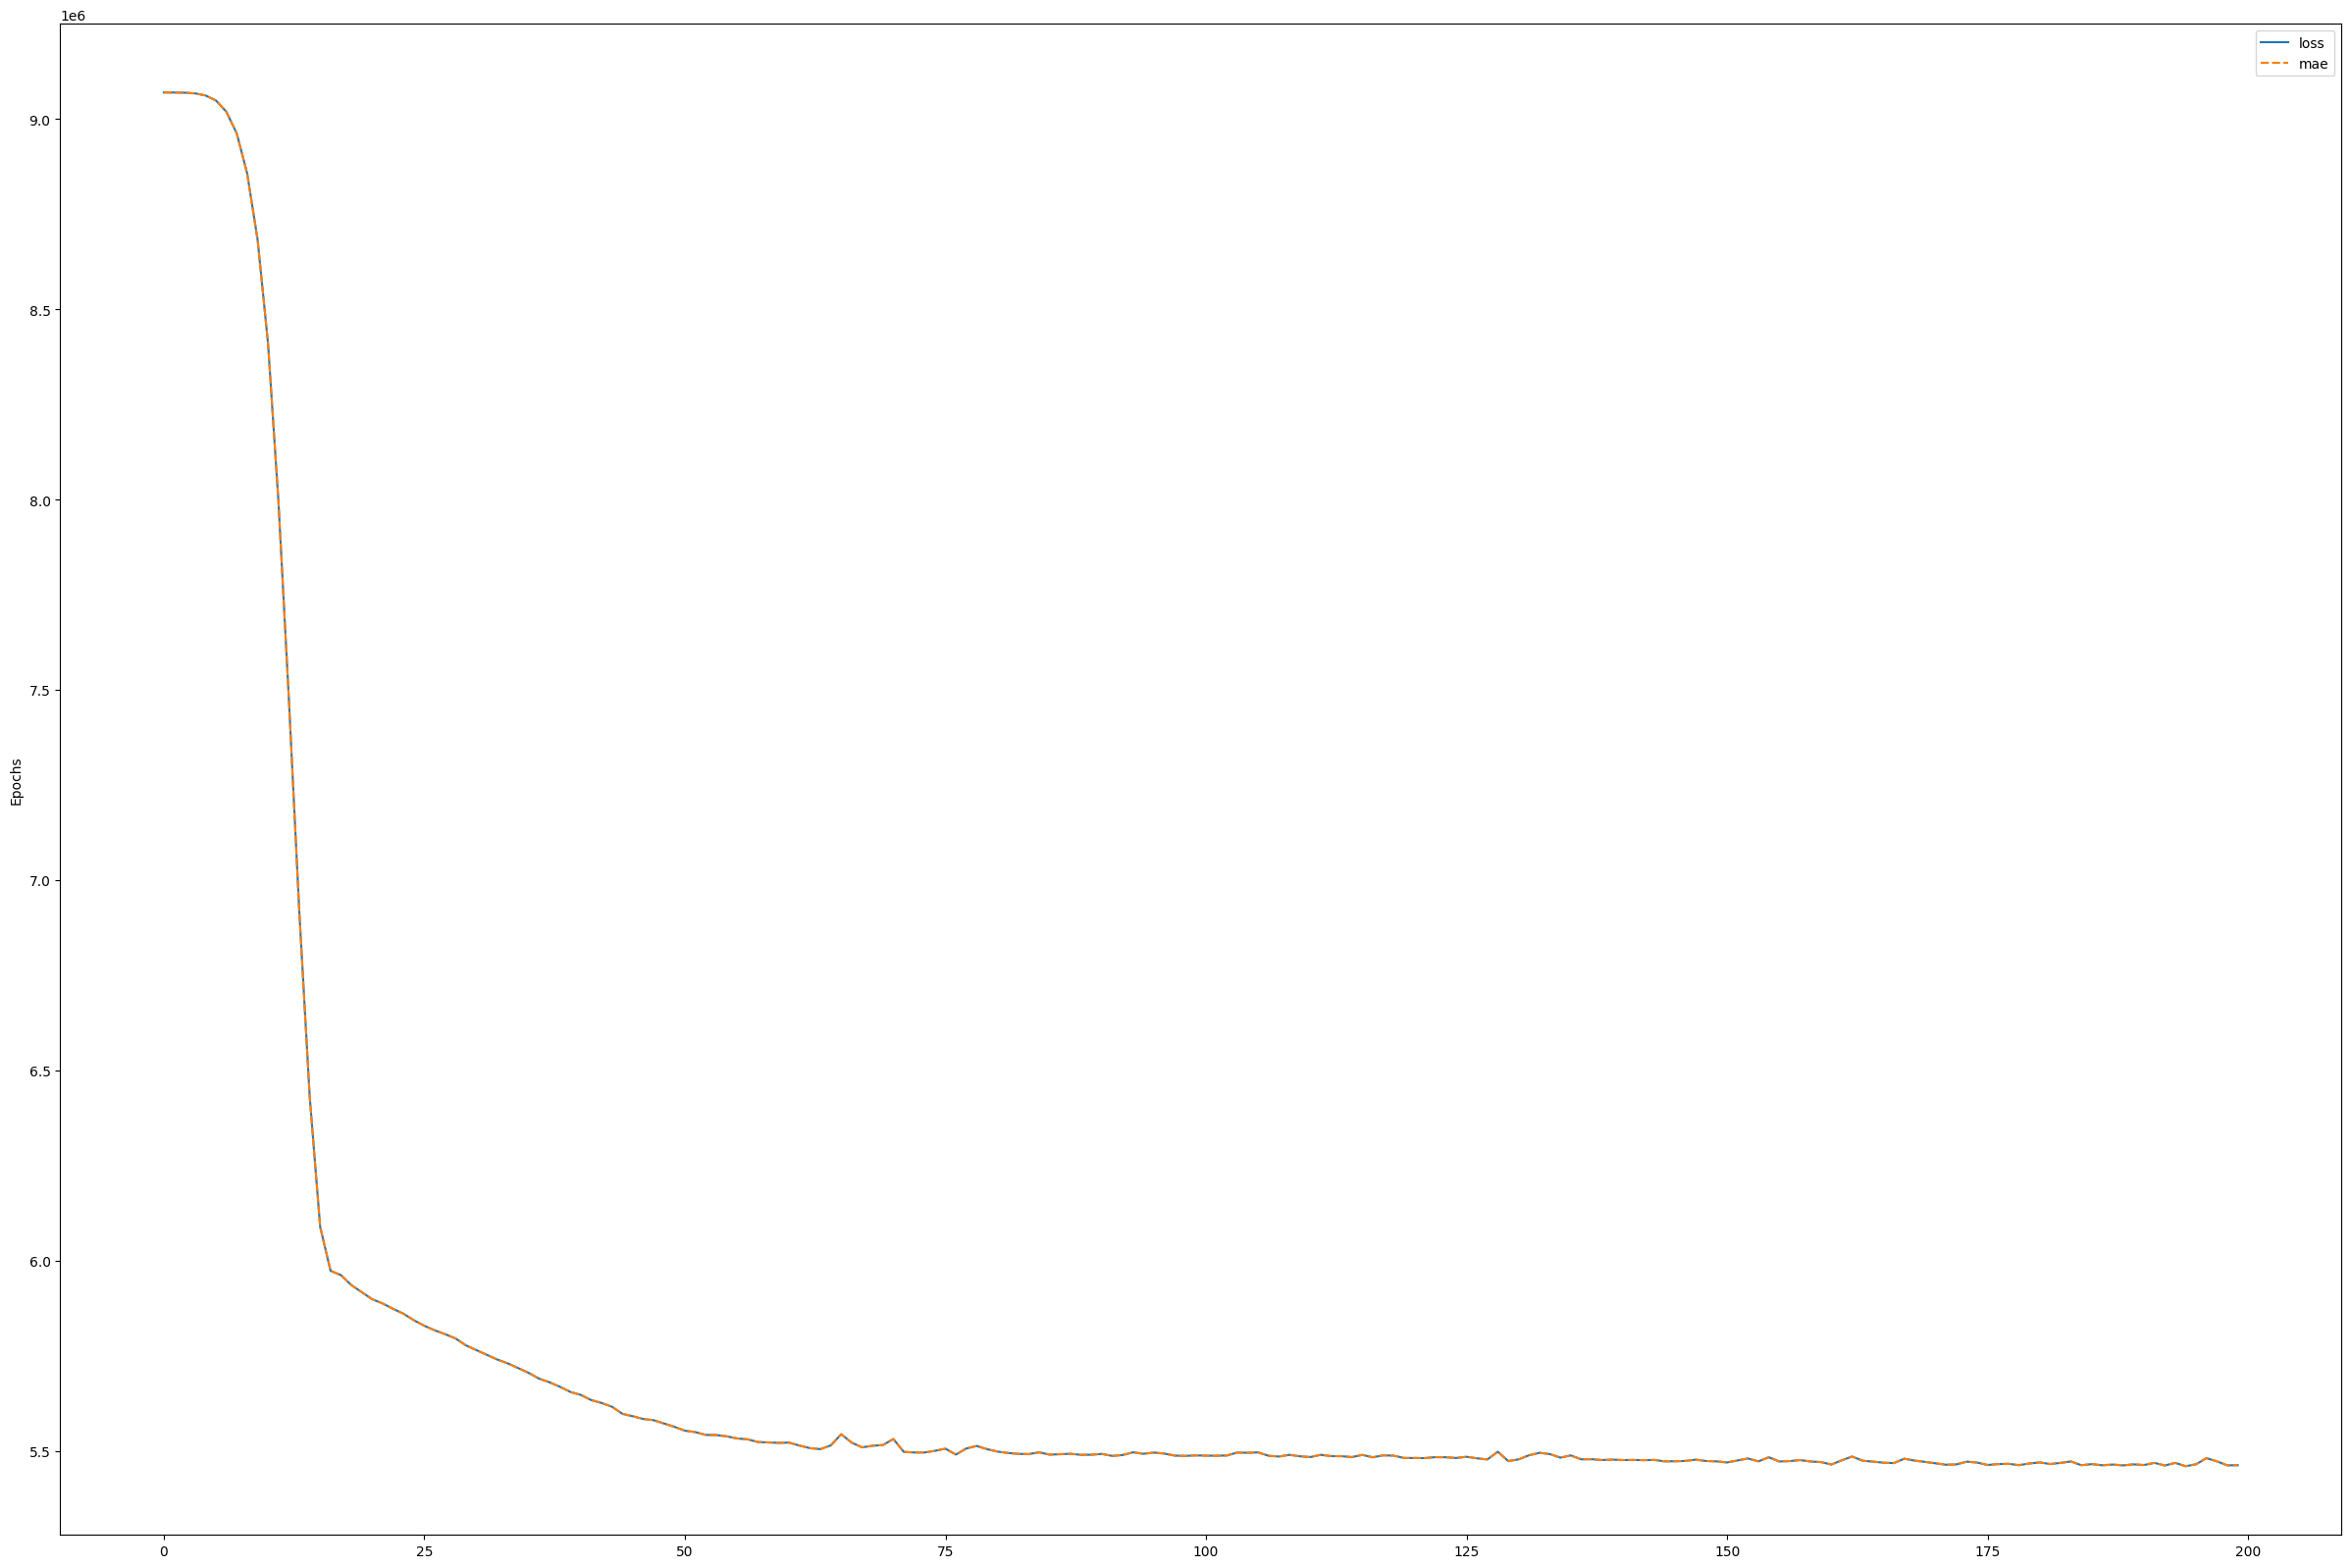

In [ ]:
# Plotting to see How Increasing Epochs Decreases Loss.
plt.figure(figsize=(30,20))
plt.ylabel("Loss")
plt.ylabel("Epochs")
sns.lineplot(data=fit_data.history)

In [32]:
# Showing the layers, output shape and the number of parameters for each layer.
nba_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
